In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
)
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
mushroom = fetch_ucirepo(id=73) 
  
# data (as pandas dataframes) 
X = mushroom.data.features 
y = mushroom.data.targets 
df = mushroom.data.original

# # metadata 
# print(mushroom.metadata) 
  
# # variable information 
# print(mushroom.variables) 

# Combine features and target into a single DataFrame
df = pd.concat([X, y], axis=1)

# Initialize the pipeline
pipeline = MLClassifierPipeline(
    df=df,
    target_column='poisonous',  # Replace with your target column name
    display_analytics=False
)

# Run the pipeline
pipeline.run_pipeline(drop_max_na_col_in=True, drop_threshold_in=0.25)

# Get feature importance
pipeline.get_feature_importance()

Dropped features with >=25% missing values: ['stalk-root']
8124 number of instances remaining.
Training Logistic Regression...
Training SVM...
Training KNN...
Training Decision Tree...
Training Random Forest...
Training Extra Trees...
Training Gradient Boosting...
Training AdaBoost...
The best model is Logistic Regression with a test accuracy of 1.0000.
The model LogisticRegression(max_iter=1000) does not support feature importance.


In [32]:
my_model = pipeline.user_model_return()

The models trained are: 

0. Logistic Regression
1. SVM
2. KNN
3. Decision Tree
4. Random Forest
5. Extra Trees
6. Gradient Boosting
7. AdaBoost


Which model would you like? 3


In [34]:
type(my_model)

sklearn.tree._classes.DecisionTreeClassifier

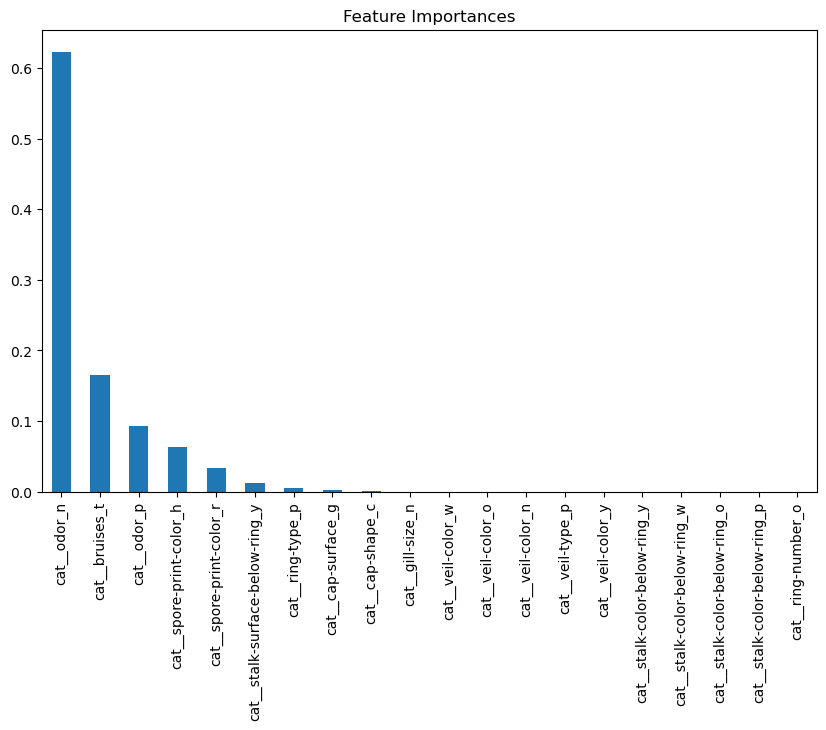

In [12]:
pipeline.get_feature_importance()

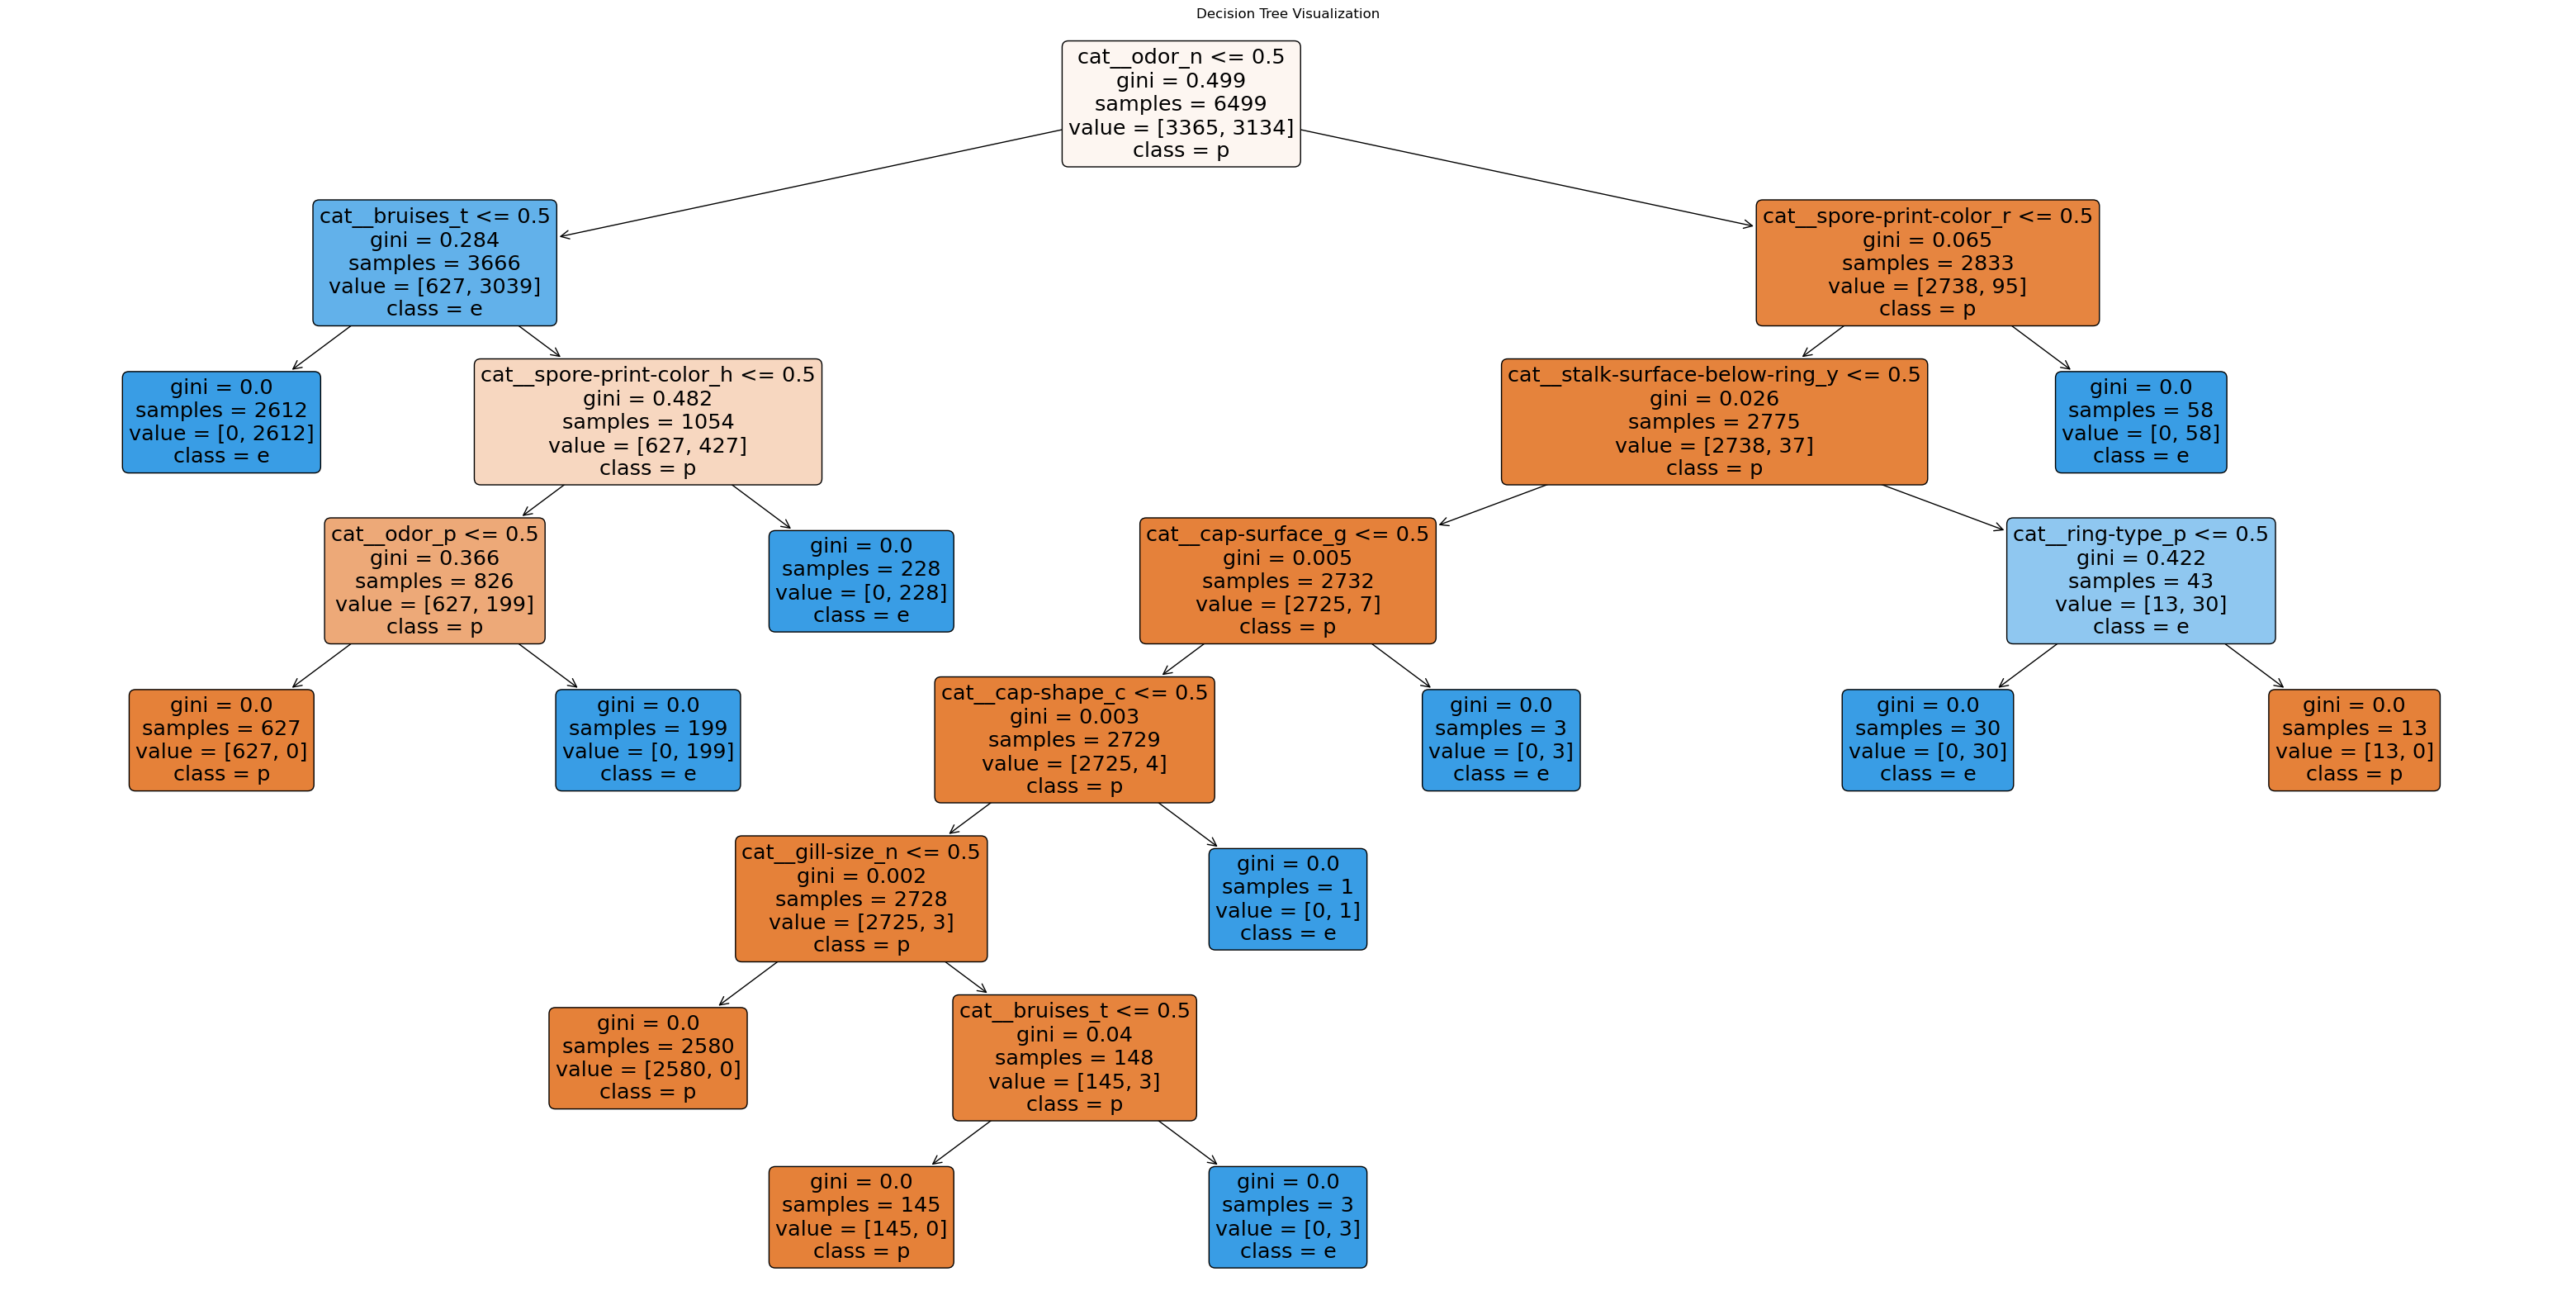

<Figure size 640x480 with 0 Axes>

In [14]:
pipeline.visualize_decision_tree()

In [134]:
# metadata 
print(mushroom.metadata) 
  
# variable information 
print(mushroom.variables) 

{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po

In [25]:
null_max_col = df.count().idxmin()
if df[null_max_col].isna().sum() > 0.25*len(df):
	df.drop(null_max_col, axis=1)
df.isna().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
poisonous                   0
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

# SCORING PIPELINE

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
)
import matplotlib.pyplot as plt
import seaborn as sns

class MLClassifierPipeline:
    def __init__(
        self,
        df,
        target_column,
        test_size=0.2,
        random_state=42,
        display_analytics=True,
    ):
        """
        Initializes the ML pipeline.

        Parameters:
        - df: pandas DataFrame containing the dataset.
        - target_column: The name of the target column.
        - test_size: Proportion of the dataset to include in the test split.
        - random_state: Controls the shuffling applied to the data before applying the split.
        - display_analytics: Whether to display analytics for each model.
        """
        self.df = df
        self.target_column = target_column
        self.test_size = test_size
        self.random_state = random_state
        self.display_analytics = display_analytics
        self.models = {
            'Logistic Regression': LogisticRegression(max_iter=1000),
            'SVM': SVC(),
            'KNN': KNeighborsClassifier(),
            'Decision Tree': DecisionTreeClassifier(),
            'Random Forest': RandomForestClassifier(),
            'Extra Trees': ExtraTreesClassifier(),
            'Gradient Boosting': GradientBoostingClassifier(),
            'AdaBoost': AdaBoostClassifier(),
        }
        self.model_results = {}
        self.best_model = None
        self.preprocessor = None
        self.trained_models = {}
        self.user_model = None

    def preprocess_data(self, drop_max_na_col=False, drop_threshold=0.25):
        """Cleans and preprocesses the data."""

        #Drops column with maximum nulls
        if drop_max_na_col==True:
            #Check for features with 25% or more NaNs and drop them
            missing_percentage = self.df.isnull().mean()
            features_to_drop = missing_percentage[missing_percentage >= drop_threshold].index
            self.df.drop(columns=features_to_drop, inplace=True)
            print(f"Dropped features with >=25% missing values: {features_to_drop.tolist()}")
            if (len(features_to_drop.tolist())/len(df.columns)) > 0.5:
                print(f"WARNING: More than 50% of the columns have been dropped per your threshold ({drop_threshold}).")
        
        # Drop rows with null values
        self.df.dropna(inplace=True)
        print(f"{len(df)} number of instances remaining.")

        # Separate features and target
        X = self.df.drop(self.target_column, axis=1)
        y = self.df[self.target_column]

        # Identify categorical and numerical columns
        categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
        numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

        # Define preprocessing steps
        self.preprocessor = ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), numerical_cols),
                ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
            ]
        )

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=self.test_size, random_state=self.random_state
        )

        # Fit and transform the training data, transform the test data
        X_train = self.preprocessor.fit_transform(X_train)
        X_test = self.preprocessor.transform(X_test)

        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

    def train_models(self):
        """Trains all models and evaluates them."""
        for name, model in self.models.items():
            print(f"Training {name}...")
            clf = Pipeline(steps=[('model', model)])
            clf.fit(self.X_train, self.y_train)
            y_pred_train = clf.predict(self.X_train)
            y_pred_test = clf.predict(self.X_test)

            train_accuracy = accuracy_score(self.y_train, y_pred_train)
            test_accuracy = accuracy_score(self.y_test, y_pred_test)

            self.model_results[name] = {
                'model': clf,
                'train_accuracy': train_accuracy,
                'test_accuracy': test_accuracy,
                'y_pred_test': y_pred_test,
            }

            if self.display_analytics:
                print(f"\n{name} Results:")
                print(f"Training Accuracy: {train_accuracy:.4f}")
                print(f"Test Accuracy: {test_accuracy:.4f}")
                print("\nClassification Report:")
                print(classification_report(self.y_test, y_pred_test))
                print("Confusion Matrix:")
                cm = confusion_matrix(self.y_test, y_pred_test)
                print(cm)
                sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, cbar_kws={'label': 'Scale'}, vmin=0, vmax=705)
                plt.title(f'{name} Confusion Matrix')
                plt.ylabel('Actual')
                plt.xlabel('Predicted')
                plt.tight_layout()
                plt.show()

            # Store trained model
            self.trained_models[name] = clf

    def select_best_model(self):
        """Selects the best model based on test accuracy."""
        best_accuracy = 0
        best_model_name = None

        for name, results in self.model_results.items():
            if results['test_accuracy'] > best_accuracy:
                best_accuracy = results['test_accuracy']
                best_model_name = name

        self.best_model = self.model_results[best_model_name]['model']
        print(f"The best model is {best_model_name} with a test accuracy of {best_accuracy:.4f}.")

    def visualize_decision_tree(self):
        """Visualizes the trained Decision Tree model."""
        # Check if the Decision Tree has been trained
        if 'Decision Tree' in self.trained_models:
            model = self.trained_models['Decision Tree'].named_steps['model']

            # Get the original class names from the target column (e.g., 'e' and 'p')
            class_names = self.y_train.unique()

            # Get the feature names from the preprocessor
            feature_names = self.preprocessor.get_feature_names_out()

            plt.figure(figsize=(40, 20))
            plot_tree(model, feature_names=feature_names, filled=True, rounded=True, class_names=class_names)
            plt.title('Decision Tree Visualization')
            plt.show()
            plt.savefig('foo.png')
        else:
            print("Decision Tree model is not trained yet.")

    def get_feature_importance(self):
        """Displays feature importance for models that support it."""

        if self.best_model is None and self.user_model is None:
            print("Please run select_best_model() or user_model_return() first.")
            return
    
        if self.user_model is not None:
            model = self.user_model.named_steps['model']
        elif self.best_model is not None:
            model = self.best_model.named_steps['model']
            
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            feature_names = self.preprocessor.get_feature_names_out()
            feature_importances = pd.Series(importances, index=feature_names)
            feature_importances.sort_values(ascending=False, inplace=True)
            plt.figure(figsize=(10, 6))
            feature_importances.head(20).plot(kind='bar')
            plt.title('Feature Importances')
            plt.show()
        else:
            print(f"The model {model} does not support feature importance.")
            

    def user_model_return(self):
        if self.trained_models:
            keys_list = list(self.trained_models.keys())
            print('The models trained are: \n')
            for i, name in enumerate(keys_list):
                print(f"{i}. {name}")
            choice = int(input('Which model would you like?'))

            # Access the value by index
            self.user_model = self.trained_models[keys_list[choice]]
            return self.user_model.named_steps['model']
        else:
            print('No models are trained yet. Please train the models to choose.')
    
    def run_pipeline(self, drop_max_na_col_in=False, drop_threshold_in=True):
        """Runs the full pipeline."""
        
        self.preprocess_data(drop_max_na_col=drop_max_na_col_in, drop_threshold=drop_threshold_in)
        self.train_models()
        self.select_best_model()

# HYPERTUNING CLASS

In [127]:
class MLHyperTuning:

    import pandas as pd
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import OneHotEncoder, StandardScaler
    from sklearn.compose import ColumnTransformer
    from sklearn.pipeline import Pipeline
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
    from sklearn.linear_model import LogisticRegression
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier, plot_tree
    from sklearn.ensemble import (
        RandomForestClassifier,
        ExtraTreesClassifier,
        GradientBoostingClassifier,
        AdaBoostClassifier,
    )
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.model_selection import GridSearchCV
    import inspect
    
    def __init__(
        self,
        model
    ):
        """
        Initializes the model for hyper parameter tuning.

        Parameters:
        - model: The model to tune
        """
        self.model = model
        self.tuned_params = {}
        self.params = {}

    def get_model_params(self):
        
        self.params = self.model.get_params()
    
        print("Current model parameters:\n")
        i=1
        for param, value in self.params.items():
            print(f"{i}. {param}: {value}")
            i+=1
        
        # Create an empty dictionary to store user-input parameters for tuning

    def get_params_to_tune(self):
        params = self.params
        while True:
            # Ask user which parameter to tune
            param_to_tune = input("\nEnter the parameter you'd like to tune (or type 'done' to finish): ").strip()
    
            # If the user types 'done', exit the loop
            if param_to_tune.lower() == 'done':
                break
            
            # Check if the entered parameter is valid (exists in the model's params)
            if param_to_tune not in params:
                print(f"Invalid parameter: '{param_to_tune}'. Please enter a valid parameter.")
                continue
    
            # Ask for new values for the parameter (you can accept multiple values for GridSearchCV)
            new_value = input(f"Enter new values for '{param_to_tune}' (comma-separated if multiple): ").strip()
    
            # Convert user input to list of values if it's comma-separated, or keep as is if single value
            if ',' in new_value:
                # Convert to a list of values, remove extra spaces, and try to convert to the appropriate type
                new_value = [eval(val.strip()) for val in new_value.split(',')]
            else:
                # Convert to the appropriate type (float, int, str, etc.) for single value
                try:
                    new_value = eval(new_value)  # Evaluates to int, float, etc.
                except:
                    new_value = new_value  # Keep it as string if eval fails
    
            # Add the parameter and its new value(s) to the tuning dictionary
            self.tuned_params[param_to_tune] = new_value
        print('\nThe parameters being tested for best tuning are: \n')
        for param, value in self.tuned_params.items():
            print(f"{param}: {value}")

    def run_tuning(self):
        """Runs the full pipeline."""
        self.get_model_params()
        self.get_params_to_tune()

In [129]:
ht_obj = MLHyperTuning(my_model)

In [131]:
ht_obj.run_tuning()

Current model parameters:

1. ccp_alpha: 0.0
2. class_weight: None
3. criterion: gini
4. max_depth: None
5. max_features: None
6. max_leaf_nodes: None
7. min_impurity_decrease: 0.0
8. min_samples_leaf: 1
9. min_samples_split: 2
10. min_weight_fraction_leaf: 0.0
11. random_state: None
12. splitter: best



Enter the parameter you'd like to tune (or type 'done' to finish):  max_depth
Enter new values for 'max_depth' (comma-separated if multiple):  3,5,7

Enter the parameter you'd like to tune (or type 'done' to finish):  done



The parameters being tested for best tuning are: 

max_depth: [3, 5, 7]
